<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series data 시각화

In [1]:
!pip install --upgrade pandas-datareader
!pip install --upgrade finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as data_reader
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 5)

#한글 폰트 사용
import platform
from matplotlib import font_manager

if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    !apt-get -qq update
    !apt-get install -qq fonts-nanum
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    #font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

!fc-cache -fv
!rm -rf ~/.cache/matplotlib

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [3]:
import matplotlib.pyplot as plt
print(plt.rcParams['font.family'])


['sans-serif']


In [4]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_names = [fm.FontProperties(fname=font).get_name() for font in font_list]
print(sorted(set(font_names)))


['Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'NanumBarunGothic', 'NanumGothic', 'NanumGothicCoding', 'NanumMyeongjo', 'NanumSquare', 'NanumSquareRound']


In [7]:
plt.rc('font', family='NanumGothicCoding')
plt.rcParams['axes.unicode_minus'] = False

### 원달러 환율 시각화

- FRED(Federal Reserve Economic Data) 에서 원달러 환율 가져오기

`DEXKOUS` - South Korea Won-Dollar 환율

Text(0.5, 1.0, '원-달러 환율 변동')

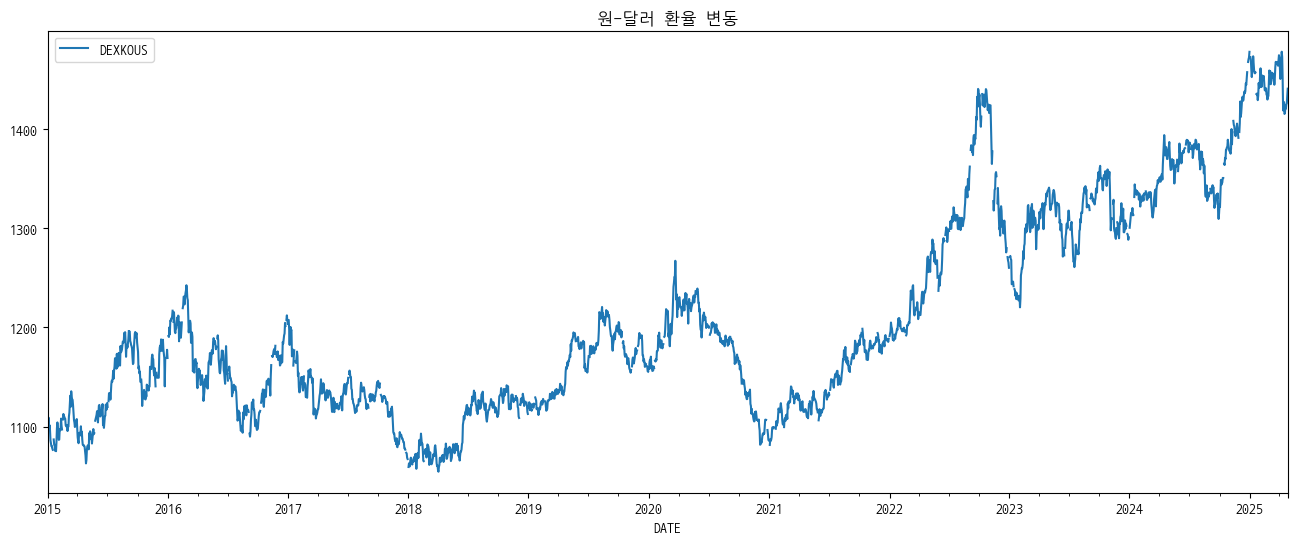

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as data_reader
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 5)

import pandas_datareader as data_reader

df = data_reader.DataReader('DEXKOUS', 'fred', '2015-01-01')
df.plot(figsize=(16, 6))
plt.title("원-달러 환율 변동")

## cufflinks 로 candle chart 그리기

cufflinks라이브러리 자체에서 plotly 와 연동이 되어서 예쁘고 쉽게 그래프를 그릴 수 있다.

`df.iplot` : plotly chart 그리기  
- shape : figure의 shape  
- default plot : line chart

candle stick 생성

- EMA : Exponential Moving Average.
- SMA : Simple Moving Average

# 시각화를 통한 주식 시장의 변동 장기 분석
- 역사적 바닥, 천장 시각화  
- 미국, 한국 시장, 금리 비교  
- 비트코인 추세 시각화

- 1970 년대 이후의 다우 존수 종합 지수 변동 시각화

In [15]:
dji1 = pd.read_csv("/content/sample_data/DJI_1970.csv", index_col=0, parse_dates=True)
dji1.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
1970-01-02,800.4,813.6,797.3,809.2,907895
1970-01-05,809.2,819.2,804.8,811.3,1295865


In [14]:
dji1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13131 entries, 1970-01-02 to 2022-01-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    13131 non-null  float64
 1   High    13131 non-null  float64
 2   Low     13131 non-null  float64
 3   Close   13131 non-null  float64
 4   Volume  13131 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 615.5 KB


In [16]:
dji1.tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-18,35661.76,35661.76,35262.02,35368.47,490284707
2022-01-19,35412.30,35547.83,35015.49,35028.65,443221700


In [21]:
dji2 = fdr.DataReader('^DJI', '2022-01-21')

dji = pd.concat([dji1, dji2])
dji.head()

,Open,High,Low,Close,Volume,Adj Close
1970-01-02,800.4,813.6,797.3,809.2,907895,NaN
1970-01-05,809.2,819.2,804.8,811.3,1295865,NaN
1970-01-06,811.3,814.1,798.7,803.7,1292481,NaN
1970-01-07,803.7,808.5,796.2,801.8,1128948,NaN
1970-01-08,801.8,809.3,796.9,802.1,1203384,NaN


In [22]:
dji.tail()

,Open,High,Low,Close,Volume,Adj Close
2025-04-28,40171.738281,40414.179688,39869.101562,40227.589844,475930000,40227.589844
2025-04-29,40233.980469,40630.488281,40222.179688,40527.621094,434830000,40527.621094
2025-04-30,40290.410156,40777.160156,39745.628906,40669.359375,599760000,40669.359375
2025-05-01,40918.039062,41099.519531,40705.628906,40752.960938,597270000,40752.960938
2025-05-02,40960.421875,41386.191406,40960.421875,41317.429688,589870000,41317.429688


<Axes: >

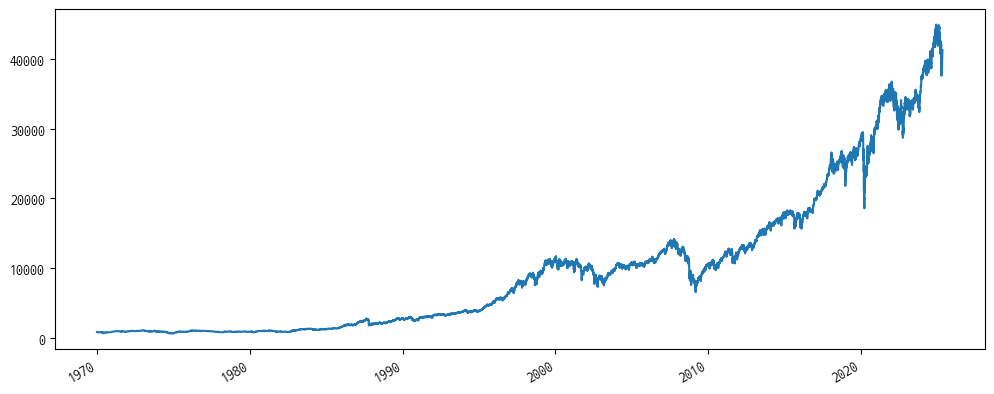

In [23]:
dji['Close'].plot()

가격의 변화가 큰 경우 y 축을 log scale로 취하면 실제 가격 변동률의 착시 현상을 없앨 수 있다. (같은 등락률이 같은 길이로 표현)

Text(0.5, 1.0, '다우존스 지수')

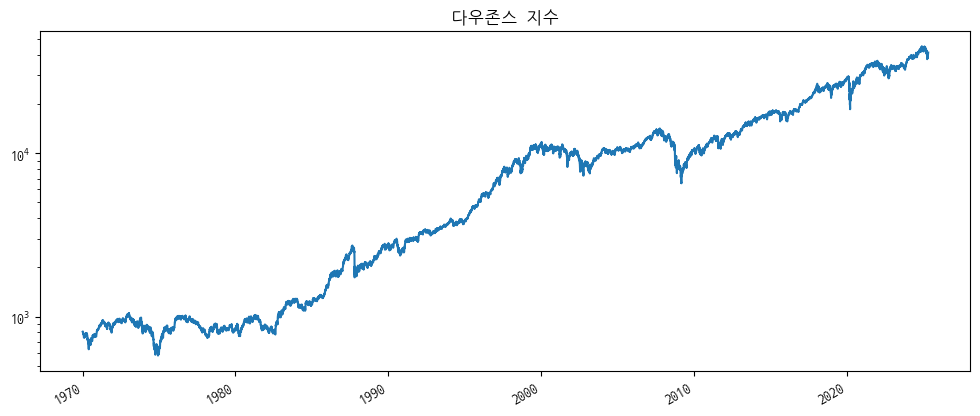

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dji['Close'].plot(ax=ax)
ax.set_yscale('log')
ax.set_title('다우존스 지수')

In [29]:
# 파일을 읽어옵니다. 첫 번째 줄은 헤더로 간주되며, 열 이름을 'date'와 'rate'로 지정합니다.
bond = pd.read_csv('/content/sample_data/FRED_rate_2Y.csv', names=['date', 'rate'], header=0)

# 'date' 열을 datetime 형식으로 변환하여 날짜 데이터를 처리할 수 있도록 합니다.
bond['date'] = pd.to_datetime(bond['date'])

# 'date' 열을 데이터프레임의 인덱스로 설정하여 날짜를 기준으로 데이터에 접근할 수 있도록 합니다.
bond.set_index('date', inplace=True)

bond.head(2)

,rate
date,
1976-06-01,7.26
1976-06-02,7.23


In [30]:
bond.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12043 entries, 1976-06-01 to 2022-07-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    11537 non-null  float64
dtypes: float64(1)
memory usage: 188.2 KB


Text(0.5, 1.0, '미국채 금리-2년물')

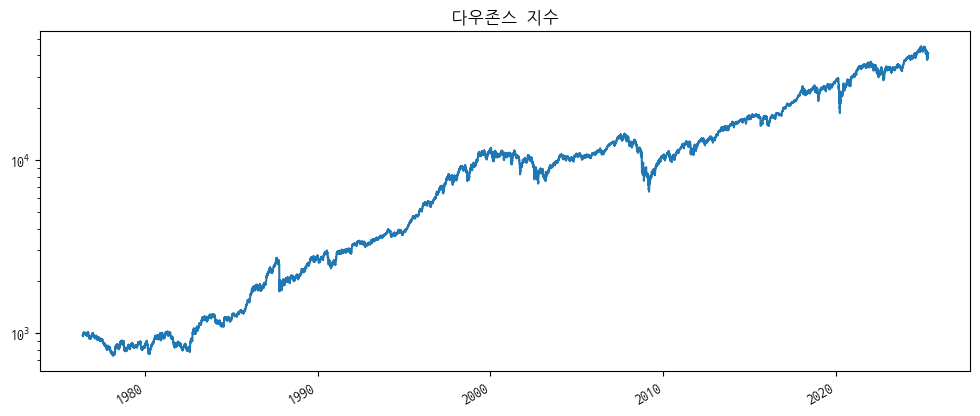

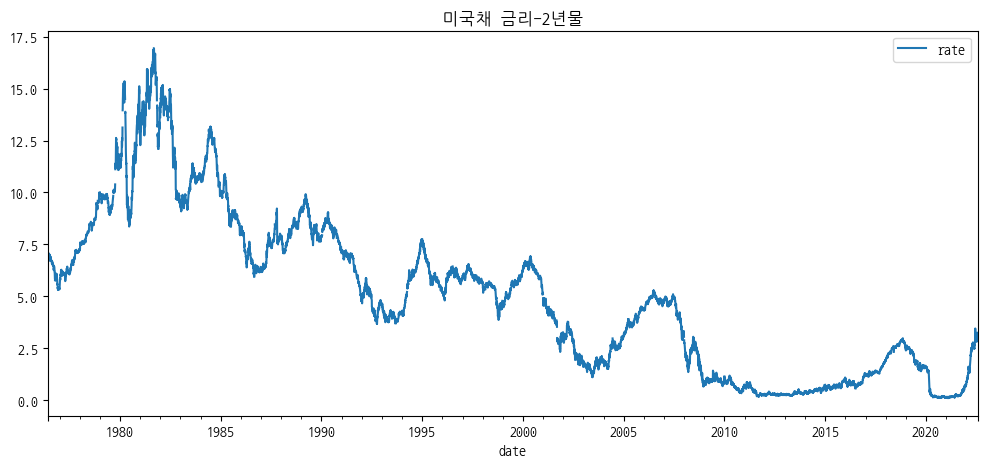

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dji['1976-06':]['Close'].plot(ax=ax)
ax.set_yscale('log')
ax.set_title('다우존스 지수')

bond.plot()
plt.title('미국채 금리-2년물')

### 1973~74년 1차 오일 쇼크
- 1979년 이란 혁명. 전세계적으로 물가는 상승하면서 실업 등의 문제는 오히려 심각해지는 스태그플레이션이 나타났으며, 미국의 FRB는 급작스럽게 불어난 달러를 미국 은행으로 회수하기 위해 금리를 21%까지 인상

In [36]:
df = bond.loc['1976-06':'1985-12']
df

,rate
date,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
1985-12-25,NaN
1985-12-26,7.99
1985-12-27,7.99


Text(0.5, 1.0, "'75-'85 사이 미국채 금리")

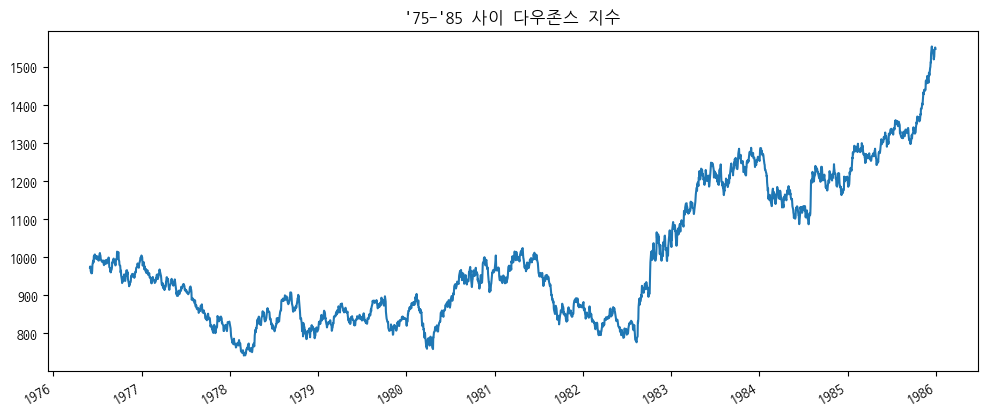

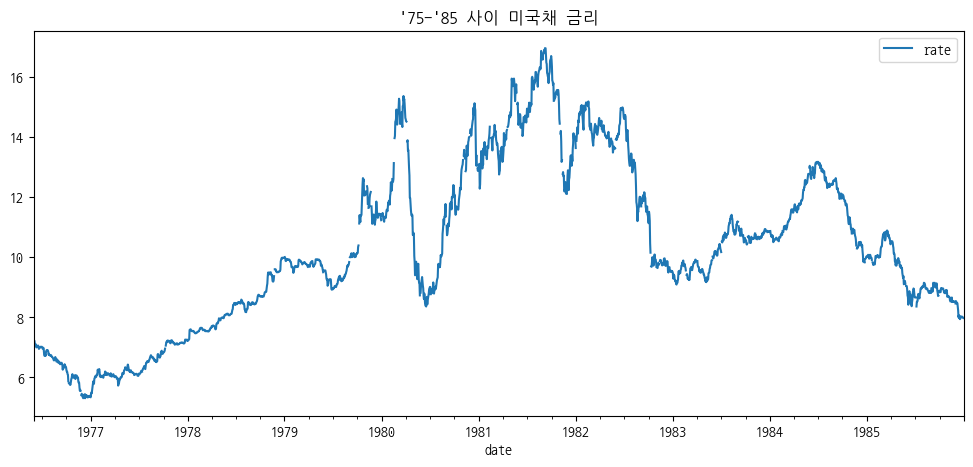

In [45]:
series = dji.loc['1976-06':'1985-12']['Close']
series.plot()
plt.title('\'75-\'85 사이 다우존스 지수')
df.plot()
plt.title('\'75-\'85 사이 미국채 금리')

In [48]:
series.max(), series.idxmax()

(1553.1, Timestamp('1985-12-16 00:00:00'))

In [50]:
series.min(), series.idxmin()

(742.1, Timestamp('1978-02-28 00:00:00'))

In [52]:
(series.max() - series.min())/series.max() *100

52.21814435644839

In [49]:
# 다우존스 공업평균 지수에서 최고점을 출력합니다.
# idxmax()는 최고점이 발생한 날짜를, max()는 해당 날짜의 지수 값을 반환합니다.
print("최고점", series.idxmax(), series.max())

# 다우존스 공업평균 지수에서 최저점을 출력합니다.
# idxmin()은 최저점이 발생한 날짜를, min()은 해당 날짜의 지수 값을 반환합니다.
print("최저점", series.idxmin(), series.min())

# 최대값과 최저값을 이용하여 최대 하락폭(Drawdown)을 계산하고, 소수점 첫째 자리까지 출력합니다.
# Drawdown = (최고점 - 최저점) / 최고점 * 100으로 계산됩니다.
print("Drawdown {:.1f}%".format((series.max()
                     - series.min()) / series.max() * 100))

최고점 1985-12-16 00:00:00 1553.1
최저점 1978-02-28 00:00:00 742.1
Drawdown 52.2%


### Dow Jones 1974 년 바닥 이후 V자 급등

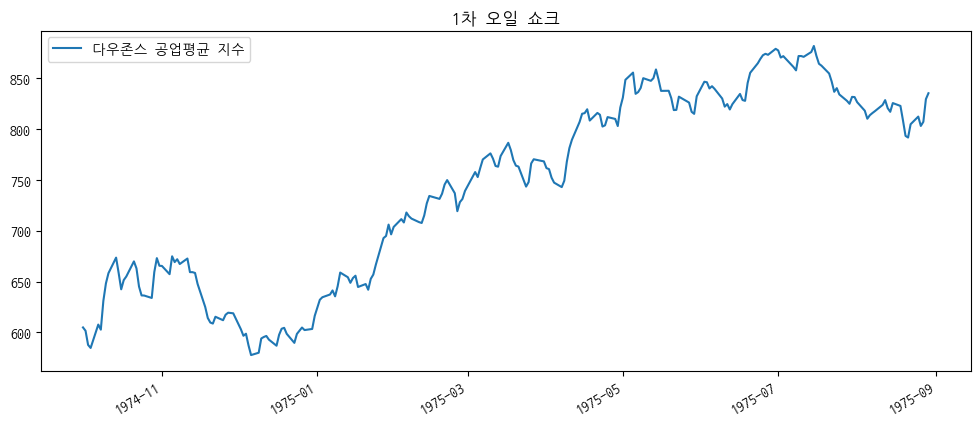

In [53]:
# 1974년 10월 1일부터 1975년 8월 31일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
series = dji.loc['1974-10-01':'1975-08-31']['Close']

# 다우존스 공업평균 지수를 플로팅하고, label을 "다우존스 공업평균 지수"로 설정합니다.
series.plot(label="다우존스 공업평균 지수")

plt.title("1차 오일 쇼크")
plt.legend()
plt.show()

In [54]:
# 다우존스 공업평균 지수에서 최고점을 출력합니다.
# idxmax()는 최고점이 발생한 날짜를, max()는 해당 날짜의 지수 값을 반환합니다.
print("최고점", series.idxmax(), series.max())

# 다우존스 공업평균 지수에서 최저점을 출력합니다.
# idxmin()은 최저점이 발생한 날짜를, min()은 해당 날짜의 지수 값을 반환합니다.
print("최저점", series.idxmin(), series.min())

# 최대값과 최저값을 이용하여 최대 하락폭(Drawdown)을 계산하고, 소수점 첫째 자리까지 출력합니다.
# Drawdown = (최고점 - 최저점) / 최고점 * 100으로 계산됩니다.
print("Drawdown {:.1f}%".format((series.max()
                     - series.min()) / series.max() * 100))

최고점 1975-07-15 00:00:00 881.8
최저점 1974-12-06 00:00:00 577.6
Drawdown 34.5%


### dot-com bubble (2000 년 3월)
- 인터넷 관련 분야가 성장하면서 산업 국가의 주식 시장이 지분 가격의 급속한 상승을 본 1995년부터 닷컴 버블이 붕괴된 2001년까지 걸친 거품 경제 현상

### 버블 붕괴 시의 다우존스 지수 하락

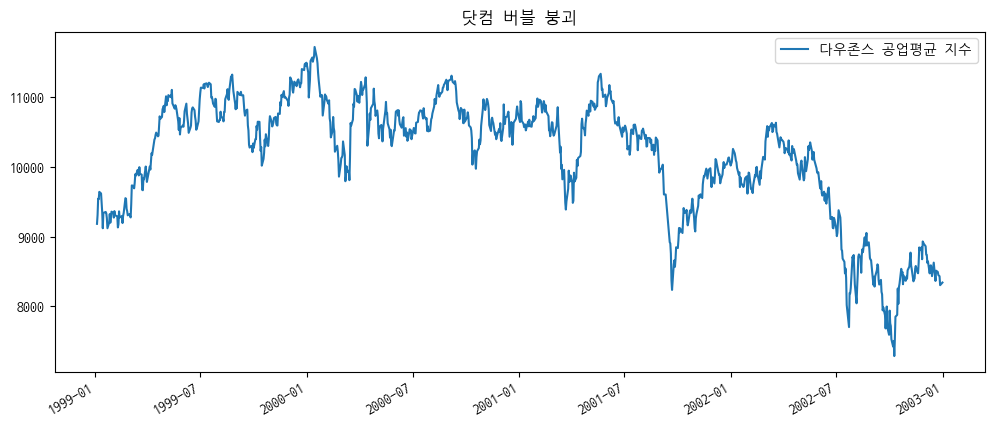

In [55]:
series = dji.loc['1999-01':'2002-12']['Close']
series.plot(label="다우존스 공업평균 지수")
plt.title("닷컴 버블 붕괴");
plt.legend();

In [56]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() - series.min())/series.max()*100))

최고점 2000-01-14 00:00:00 11723.0
최저점 2002-10-09 00:00:00 7286.27
Drawdown 37.8%


### 2000 년 3월 dot-com bubble의 Nasdaq 붕괴
1) 3/7 거래량이 크게 증가하며 하락  
2) 3/10 오전장에서만 85 포인트 뛰어 오르며 사상 최고치 경신. 오후에 급락하여 불과 2 포인트 상승으로 마감.  거래량은 평균치 보다 13%나 많음. stall day (기관이 팔고 있다는 표시)  
3) 3/14 대량 거래와 함께 4%나 하락  
4) 3/16~24 까지 상승세. 랠리가 다시 시작되는 것 아닌가 하는 착각을 불러 일으킴.  
5) 4번째 매물 출회되며 상승세에 찬물을 끼얹음.  stall day.  
6) 5번째 매물 출회

YF.download() has changed argument auto_adjust default to True


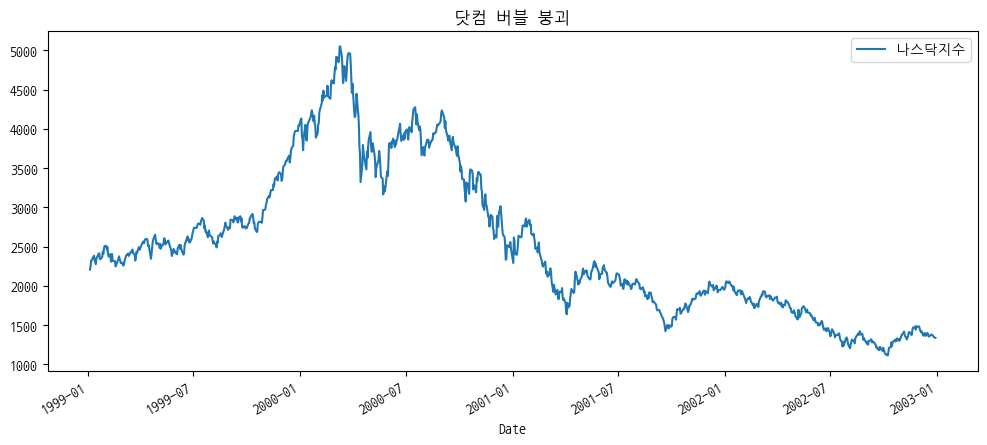

In [57]:
df = yf.download('^IXIC', start='1999-01-01', end='2002-12-31',
                 progress=False, multi_level_index=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [58]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() - series.min())/series.max()*100))

최고점 2000-03-10 00:00:00 5048.6201171875
최저점 2002-10-09 00:00:00 1114.1099853515625
Drawdown 77.9%


### Nasdaq 지수의 2003 년 바닥 확인 후 V자 상승

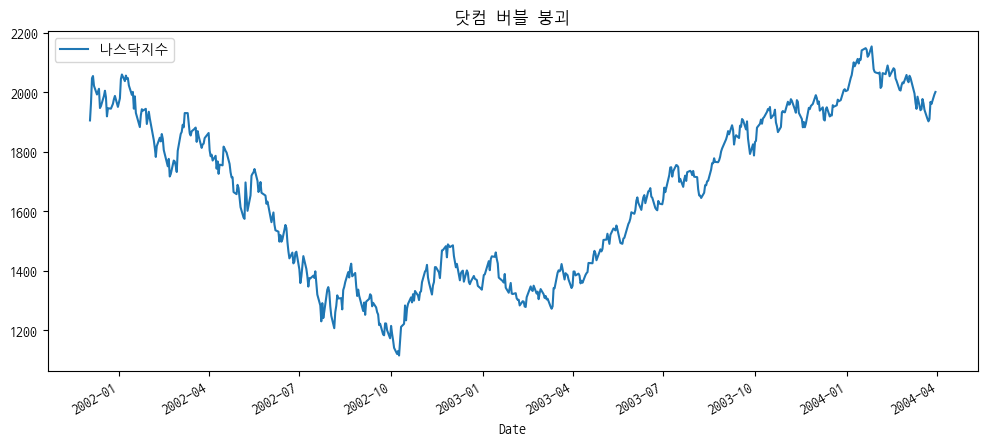

In [59]:
df = yf.download('^IXIC', start='2001-12-01', end='2004-03-31', progress=False, multi_level_index=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [61]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("상승폭 {:.1f}%".format((series.max() - series.min())/series.min()*100))

최고점 2004-01-26 00:00:00 2153.830078125
최저점 2002-10-09 00:00:00 1114.1099853515625
상승폭 93.3%


### 금융위기 (2007 - 2010)
-  2007년 4월(서브프라임 모기지 사태) 또는 2008년 9월부터 미국에서 시작된 세계 규모의 경제 위기

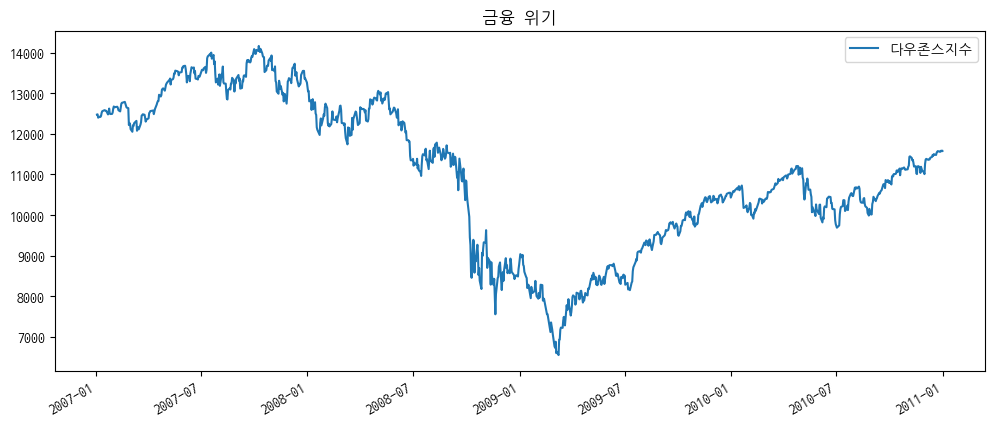

In [62]:
series = dji.loc['2007-01-02':'2010-12-31']['Close']
series.plot(label="다우존스지수")
plt.title("금융 위기");
plt.legend();

In [63]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() - series.min())/series.max()*100))

최고점 2007-10-09 00:00:00 14164.5
최저점 2009-03-09 00:00:00 6547.05
Drawdown 53.8%


### 2019년 코로나 팬데믹과 2022년의 하락세

- 2019년 12월 중국 우한에서 최초 발생  
- 한국 종합주가 지수와 비교

In [64]:
kospi = fdr.DataReader("^KS11", start='2018-12-01', end='2020-04-01')
kospi.head(2)

,Open,High,Low,Close,Volume,Adj Close
2018-12-03,2127.780029,2136.639893,2113.600098,2131.929932,436600,2131.929932
2018-12-04,2125.669922,2128.939941,2105.449951,2114.350098,507500,2114.350098


In [65]:
nasdaq = fdr.DataReader("^IXIC", start='2018-12-01', end='2020-04-01')
nasdaq.head(2)

,Open,High,Low,Close,Volume,Adj Close
2018-12-03,7486.129883,7486.509766,7392.220215,7441.509766,2643150000,7441.509766
2018-12-04,7407.950195,7421.109863,7150.109863,7158.430176,2655720000,7158.430176


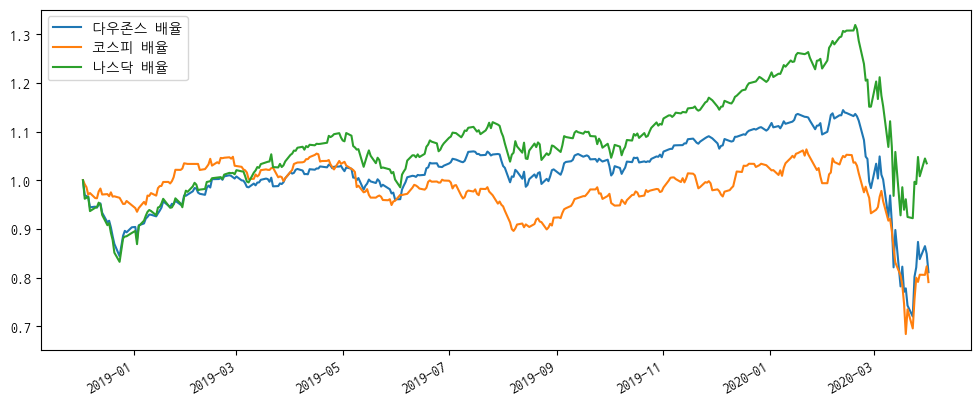

In [71]:
# 2018년 12월 1일부터 2020년 4월 1일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
dj_series = dji.loc['2018-12-01':'2020-04-01']['Close']

# KOSPI 종합주가지수에서 'Close' 열을 선택합니다.
ko_series = kospi['Close']

# 나스닥 지수에서 'Close' 열을 선택합니다.
na_series = nasdaq['Close']

# 기준 시점 대비 배율로 변환
s1 = dj_series / dj_series[0]
s2 = ko_series / ko_series[0]
s3 = na_series / na_series[0]

# dj_series.plot(label='다우존스')
# ko_series.plot(label='코스피')
# na_series.plot(label='나스닥')
# plt.legend()
# plt.title("다우존스 vs 코스피 vs 나스닥")

s1.plot(label='다우존스 배율')
s2.plot(label='코스피 배율')
s3.plot(label='나스닥 배율')
plt.legend()

다우존스
최고점 2020-02-12 00:00:00 29551.42
최저점 2020-03-23 00:00:00 18591.93
Drawdown 37.1%

종합주가지수
최고점 2020-01-22 00:00:00 2267.25
최저점 2020-03-19 00:00:00 1457.6400146484375
Drawdown 35.7%

나스닥지수
최고점 2020-02-19 00:00:00 9817.1796875
최저점 2018-12-24 00:00:00 6192.919921875
Drawdown 36.9%


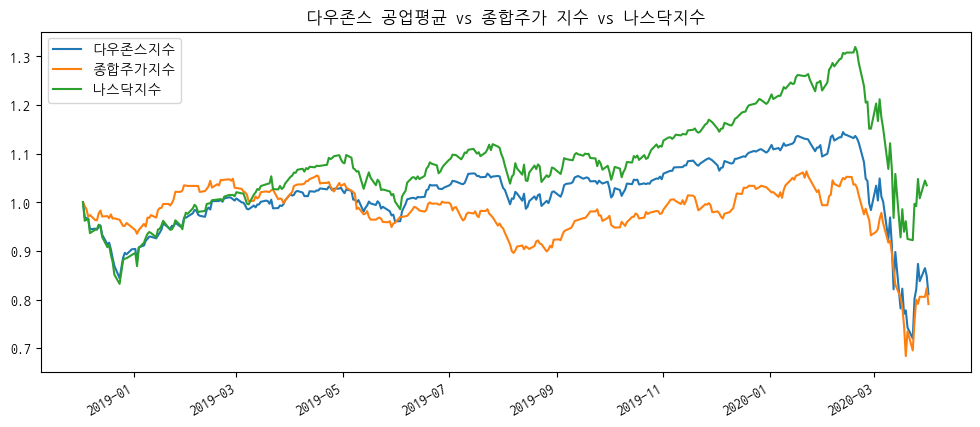

In [66]:
# 2018년 12월 1일부터 2020년 4월 1일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
dj_series = dji.loc['2018-12-01':'2020-04-01']['Close']

# KOSPI 종합주가지수에서 'Close' 열을 선택합니다.
ko_series = kospi['Close']

# 나스닥 지수에서 'Close' 열을 선택합니다.
na_series = nasdaq['Close']

# 다우존스 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series1 = dj_series / dj_series[0]

# 종합주가지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series2 = ko_series / ko_series[0]

# 나스닥 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series3 = na_series / na_series[0]

# 다우존스 지수를 플로팅하고, label을 '다우존스지수'로 설정합니다.
series1.plot(label='다우존스지수')

# 종합주가지수를 플로팅하고, label을 '종합주가지수'로 설정합니다.
series2.plot(label='종합주가지수')

# 나스닥 지수를 플로팅하고, label을 '나스닥지수'로 설정합니다.
series3.plot(label='나스닥지수')

# 그래프의 제목을 "다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수"로 설정합니다.
plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")

# 그래프에 범례(legend)를 추가하여 플로팅된 라인의 레이블을 표시합니다.
plt.legend()

# 다우존스 지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("Drawdown {:.1f}%".format((dj_series.max()
                                 - dj_series.min())/dj_series.max()*100))
print()

# 종합주가지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("Drawdown {:.1f}%".format((ko_series.max()
                                 - ko_series.min())/ko_series.max()*100))
print()

# 나스닥 지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("Drawdown {:.1f}%".format((na_series.max()
                                 - na_series.min())/na_series.max()*100))

### 2020년 양적 완화 이후의 주가 회복

다우존스
최고점 2024-12-04 00:00:00 45014.0390625
최저점 2020-03-23 00:00:00 18591.9296875
상승폭 142.1%

종합주가지수
최고점 2021-07-06 00:00:00 3305.2099609375
최저점 2020-03-19 00:00:00 1457.6400146484375
상승폭 126.8%

나스닥지수
최고점 2024-12-16 00:00:00 20173.890625
최저점 2020-03-23 00:00:00 6860.669921875
상승폭 194.1%


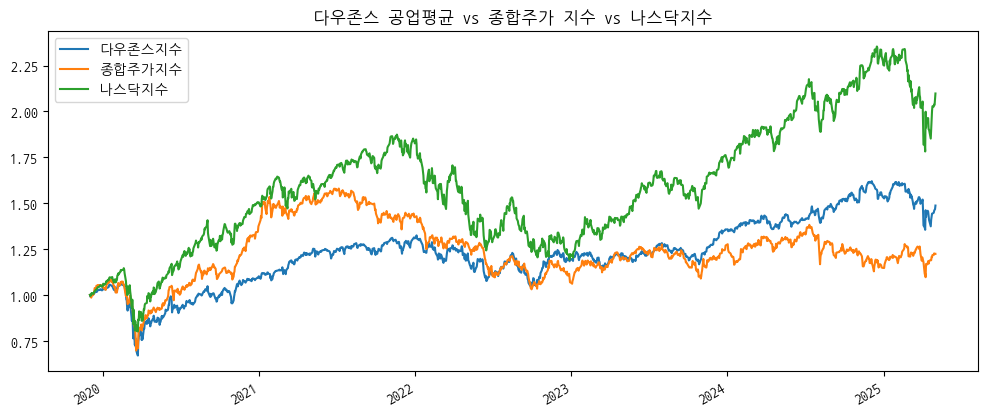

In [72]:
# 2019년 12월 1일부터 다우존스 지수('^DJI') 데이터를 불러옵니다.
df1 = fdr.DataReader('^DJI',  start='2019-12-01')

# 2019년 12월 1일부터 KOSPI 지수('^KS11') 데이터를 불러옵니다.
df2 = fdr.DataReader('^KS11', start='2019-12-01')

# 2019년 12월 1일부터 나스닥 지수('^IXIC') 데이터를 불러옵니다.
df3 = fdr.DataReader('^IXIC', start='2019-12-01')

# 각 지수의 'Close'(종가) 데이터를 선택합니다.
dj_series = df1['Close']
ko_series = df2['Close']
na_series = df3['Close']

# 다우존스 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series1 = dj_series / dj_series[0]

# 종합주가지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series2 = ko_series / ko_series[0]

# 나스닥 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series3 = na_series / na_series[0]

# 다우존스 지수를 플로팅하고, label을 '다우존스지수'로 설정합니다.
series1.plot(label='다우존스지수')

# 종합주가지수를 플로팅하고, label을 '종합주가지수'로 설정합니다.
series2.plot(label='종합주가지수')

# 나스닥 지수를 플로팅하고, label을 '나스닥지수'로 설정합니다.
series3.plot(label='나스닥지수')

# 그래프의 제목을 "다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수"로 설정합니다.
plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")

# 그래프에 범례(legend)를 추가하여 플로팅된 라인의 레이블을 표시합니다.
plt.legend()

# 다우존스 지수의 최고점, 최저점 및 상승폭 출력
print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("상승폭 {:.1f}%".format((dj_series.max()
                            - dj_series.min())/dj_series.min()*100))
print()

# 종합주가지수의 최고점, 최저점 및 상승폭 출력
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("상승폭 {:.1f}%".format((ko_series.max()
                            - ko_series.min())/ko_series.min()*100))
print()

# 나스닥 지수의 최고점, 최저점 및 상승폭 출력
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("상승폭 {:.1f}%".format((na_series.max()
                            - na_series.min())/na_series.min()*100))

## 비트코인 가격 추세

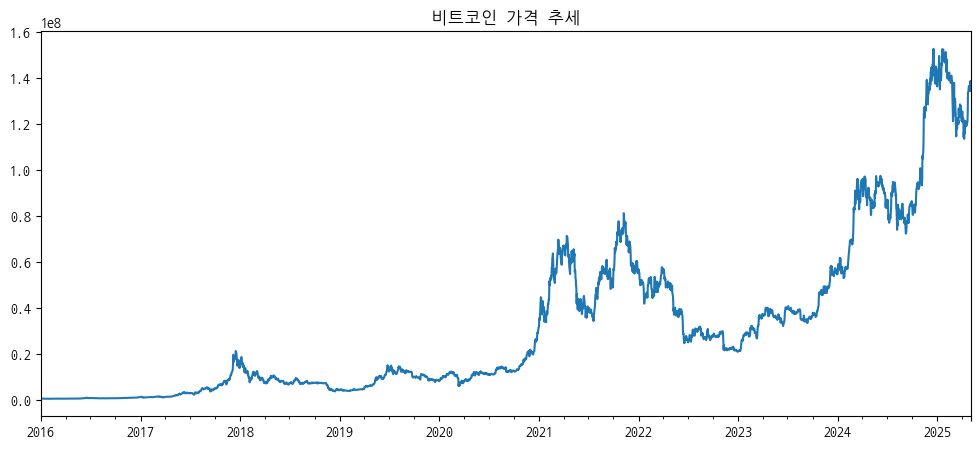

In [73]:
#비트코인 원화 가격 (빗썸), 2016~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()
plt.title("비트코인 가격 추세");